**Mounting Google Drive to import the CustomerChurn Dataset and Import Python Libraries.**

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, roc_auc_score

!pip install keras-tuner
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense
from keras import models
from keras import Model
from tensorflow.keras import layers
import kerastuner as kt
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install scikit-plot
import scikitplot as skplt




**Data Importation.**

In [150]:
customer_churn=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [151]:
customer_churn.head() #Understanding the structure of the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [152]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [153]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [154]:
customer_churn.describe() #Summary statistics

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Manipulating the Data

In [155]:
customer_churn = customer_churn.drop(['customerID'], axis = 1)
customer_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn.TotalCharges, errors='coerce')
customer_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [157]:
customer_churn[np.isnan(customer_churn['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [158]:
customer_churn[customer_churn['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')



```
There are no missing values in the 'tenure'column again.
```



In [159]:
#Removing the missing rows in the 'tenure'column since they are few
customer_churn.drop(labels=customer_churn[customer_churn['tenure'] == 0].index, axis=0, inplace=True)
customer_churn[customer_churn['tenure'] == 0].index

Int64Index([], dtype='int64')

In [160]:
#Filling the missing values in 'TotalCharges'column with its mean value
customer_churn.fillna(customer_churn["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [161]:
#Checking for and handling missing values in the original data (Customer_Churn Dataframe)
missing_values = customer_churn.isnull().sum()
missing_values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [162]:
#This replaces the "0" with a "No" and the "1" with a "Yes"
customer_churn["SeniorCitizen"]= customer_churn["SeniorCitizen"].map({0: "No", 1: "Yes"})
customer_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [163]:
print(customer_churn['Churn'].unique())


['No' 'Yes']


In [164]:
#Convert "No" and "Yes" to "0" and "1" respectively
customer_churn['Churn'] = customer_churn['Churn'].map({'Yes': 1, 'No': 0})


print(customer_churn['Churn'].unique())


[0 1]


In [165]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
customer_churn[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [166]:
#Examining the distribution of the target variable
print(customer_churn['Churn'].value_counts())

0    5163
1    1869
Name: Churn, dtype: int64


**Exploratory Data Analysis**

In [167]:
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']

# Create subplots using 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gender_labels, values=customer_churn['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=churn_labels, values=customer_churn['Churn'].value_counts(), name="Churn"),
              1, 2)

# Using `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Behaviour Across Genders",

    #Annotations to add in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [168]:
fig = px.histogram(customer_churn, x="Churn", color="Contract", barmode="group", title="<b> Distributions of Customer Contracts<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [169]:
color_map = {"Yes": '#00AA96', "No": '#F6C980'}
fig = px.histogram(customer_churn, x="Churn", color="SeniorCitizen", title="<b>Chrun Distribution Among Senior Citizens</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [170]:
fig = px.histogram(customer_churn, x = 'SeniorCitizen')
fig.show()

In [171]:
fig = px.histogram(customer_churn, x = 'Contract')
fig.show()

In [172]:
fig = px.histogram(customer_churn, x = 'MonthlyCharges')
fig.show()

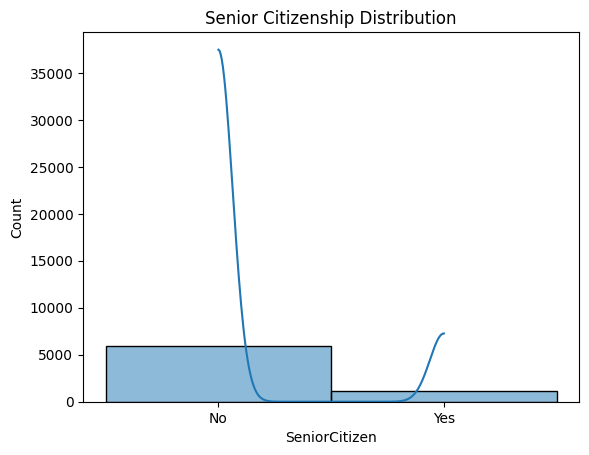

In [173]:
# Univariate analysis for a numerical feature
sns.histplot(customer_churn['SeniorCitizen'], kde=True)
plt.title('Senior Citizenship Distribution')
plt.show()


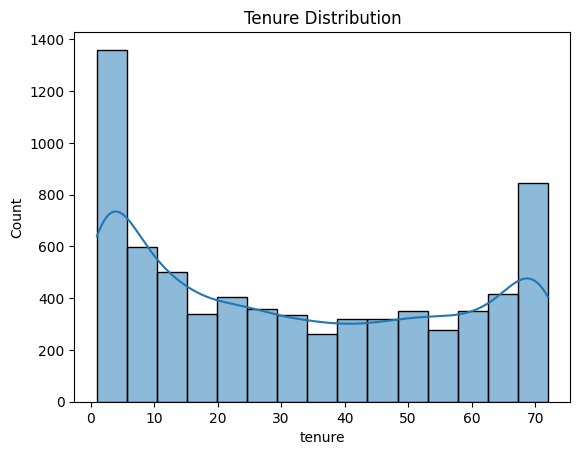

In [174]:
# Univariate analysis for a numerical feature
sns.histplot(customer_churn['tenure'], kde=True)
plt.title('Tenure Distribution')
plt.show()

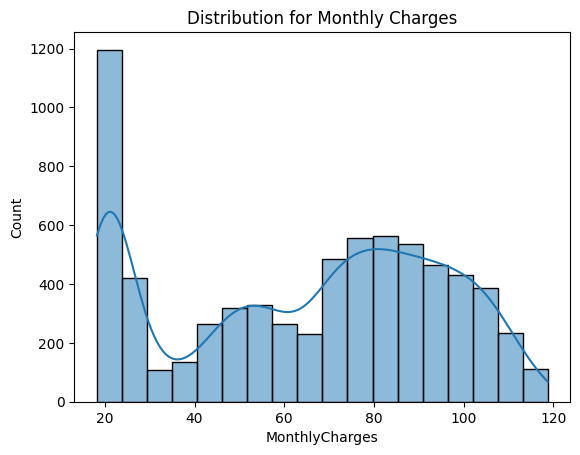

In [175]:
# Univariate analysis for a numerical feature
sns.histplot(customer_churn['MonthlyCharges'], kde=True)
plt.title('Distribution for Monthly Charges')
plt.show()

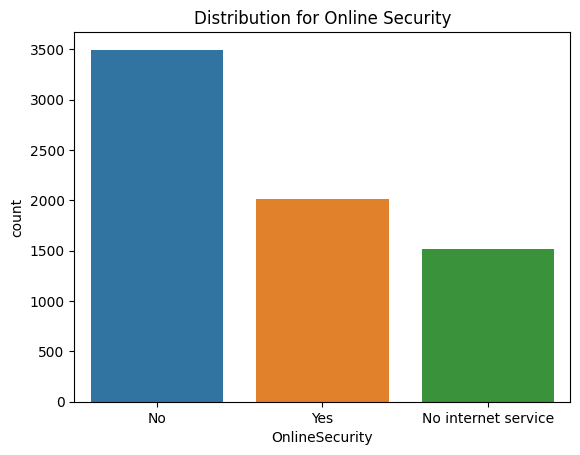

In [176]:
# Univariate analysis for a categorical feature
sns.countplot(x='OnlineSecurity', data=customer_churn)
plt.title('Distribution for Online Security')
plt.show()

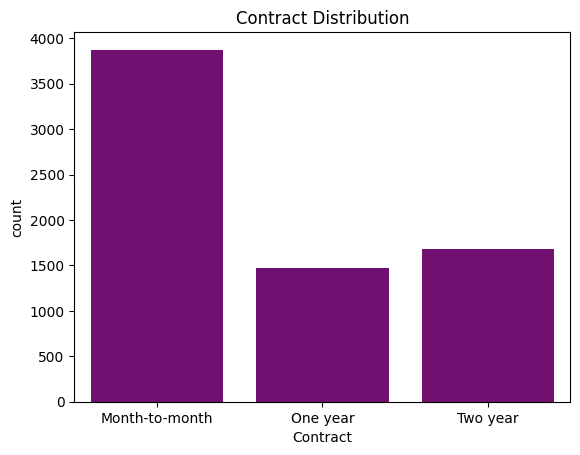

In [177]:
# Univariate analysis for a categorical feature
sns.countplot(x='Contract', data=customer_churn, color = 'purple')
plt.title('Contract Distribution')
plt.show()

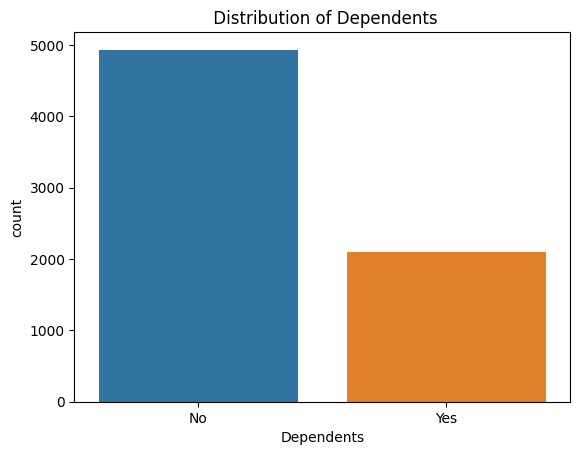

In [178]:
# Univariate analysis for a categorical feature
sns.countplot(x='Dependents', data=customer_churn)
plt.title(' Distribution of Dependents')
plt.show()

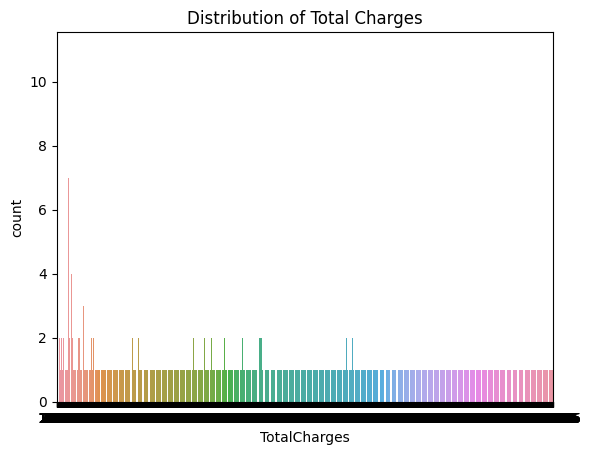

In [179]:
# Univariate analysis for a categorical feature
sns.countplot(x='TotalCharges', data=customer_churn)
plt.title('Distribution of Total Charges')
plt.show()

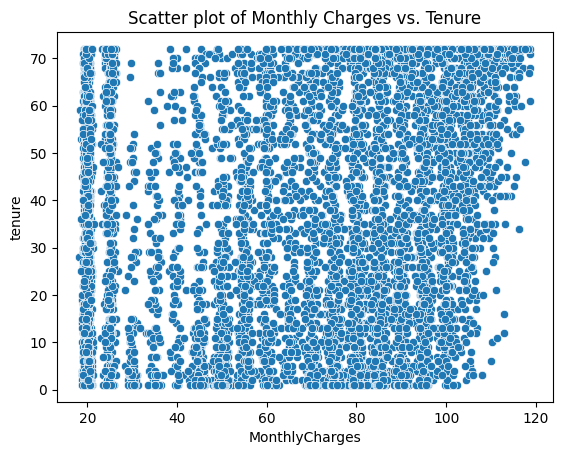

In [180]:
# Bivariate analysis for numerical features
sns.scatterplot(x='MonthlyCharges', y='tenure', data=customer_churn)
plt.title('Scatter plot of Monthly Charges vs. Tenure')
plt.show()


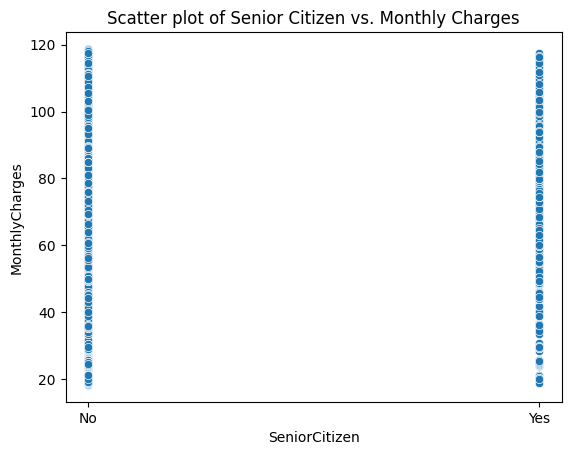

In [181]:
# Bivariate analysis for numerical features
sns.scatterplot(x='SeniorCitizen', y='MonthlyCharges', data=customer_churn)
plt.title('Scatter plot of Senior Citizen vs. Monthly Charges')
plt.show()


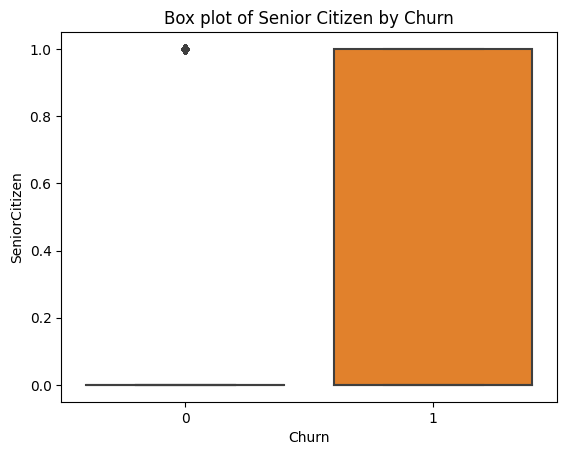

In [182]:
# Bivariate analysis for a combination of numerical and categorical features
customer_churn['SeniorCitizen'] = customer_churn['SeniorCitizen'].astype('category')
customer_churn['SeniorCitizen'] = customer_churn['SeniorCitizen'].cat.codes

sns.boxplot(x='Churn', y='SeniorCitizen', data=customer_churn)
plt.title('Box plot of Senior Citizen by Churn')
plt.show()


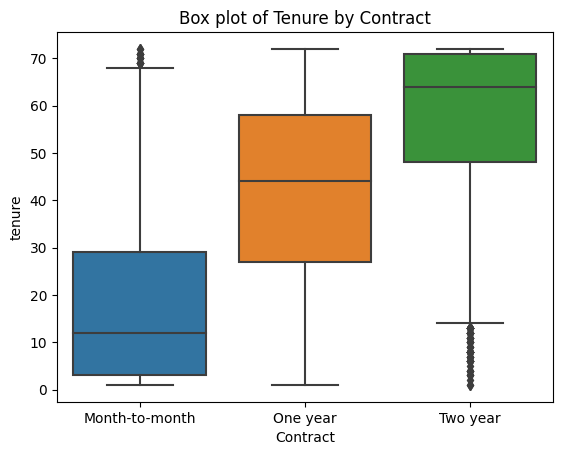

In [183]:
# Bivariate analysis for a combination of numerical and categorical features
sns.boxplot(x='Contract', y='tenure', data=customer_churn)
plt.title('Box plot of Tenure by Contract')
plt.show()

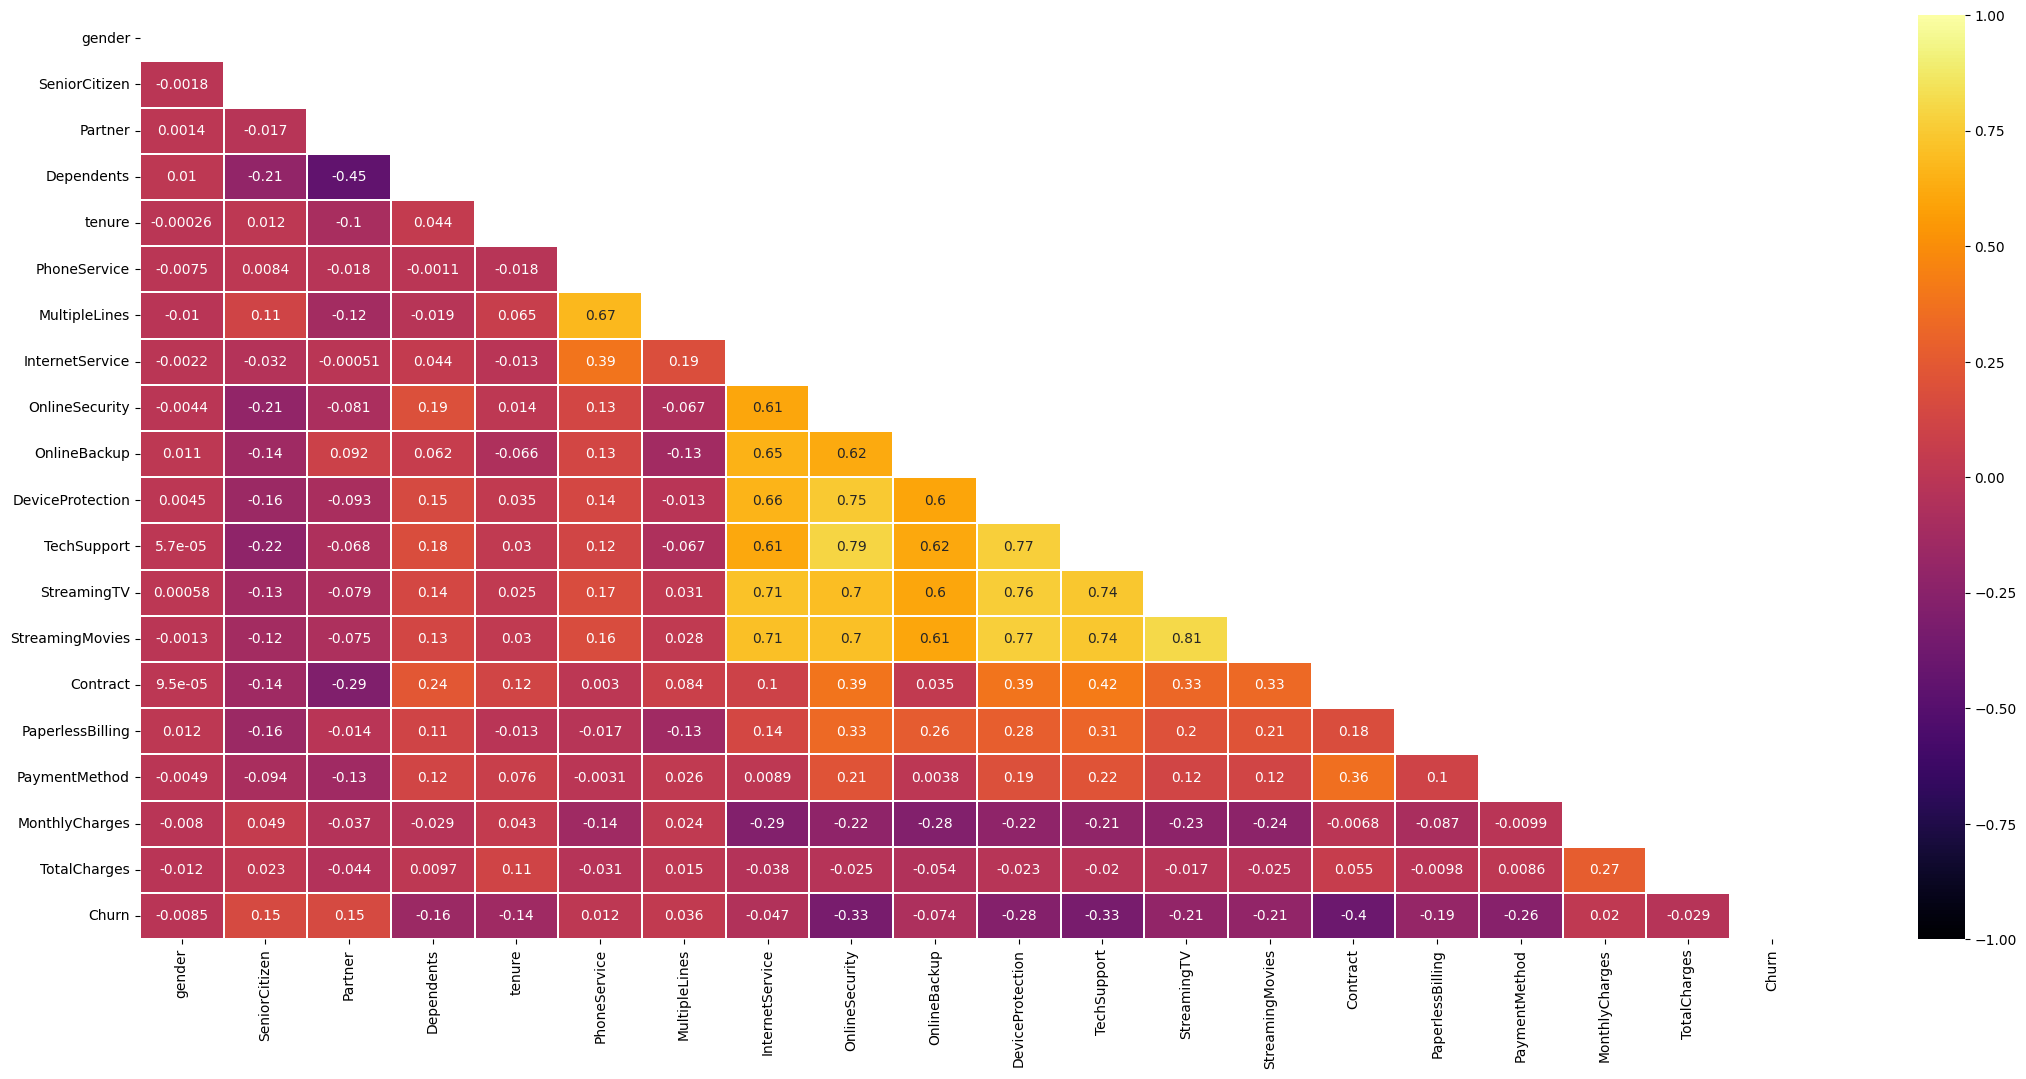

In [184]:
plt.figure(figsize=(27, 12))

corr = customer_churn.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='inferno', vmin=-1, vmax=1)

In [ ]:
#Counting 1 and 0 Value in the Churn column
color = {1: "#800080", 2: "#7bc043"}

colors = customer_churn["Churn"].map(lambda x: color.get(x, "#000000"))
print(customer_churn.Churn.value_counts())
p=customer_churn.Churn.value_counts().plot(kind="bar")

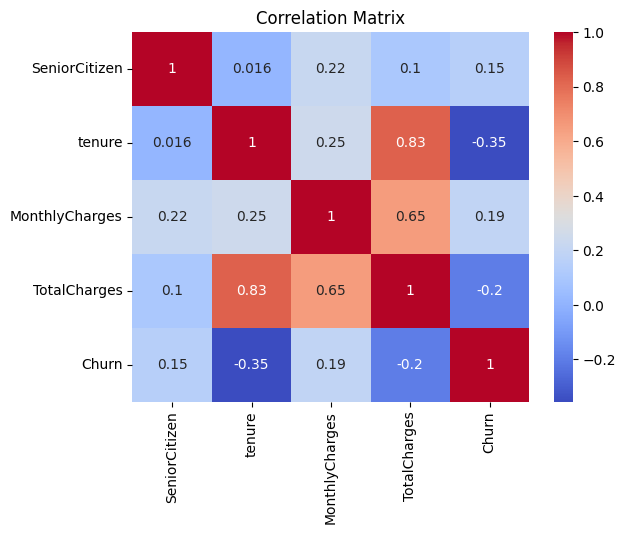

In [188]:
# Correlation matrix
correlation_matrix = customer_churn.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**FEATURE ENGINEERING.**

*Extracting Relevant Features that can define a customer churn.*

In [189]:
categorical_columns = ['gender','SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


# Define the features/independent variables (X) and target/dependent variable (y)
X = customer_churn.drop(columns=['Churn'])  # independent variables
y = customer_churn['Churn']  # dependent variable

# Preprocess categorical features using label encoding
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Apply feature selection (chi-squared test) to select the top 'n' features
n =9  # Set the number of features you want to select

selector = SelectKBest(score_func=chi2, k=n)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected Features:")
print(selected_features)



Selected Features:
Index(['SeniorCitizen', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


In [190]:
# Perform one-hot encoding
df = pd.get_dummies(selected_features, columns= categorical_columns)
df

,Contract,DeviceProtection,MonthlyCharges,OnlineBackup,OnlineSecurity,SeniorCitizen,TechSupport,TotalCharges,tenure
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0


In [191]:
#Perform one-hot encoding for all categorical columns
encoded_data = pd.get_dummies(selected_features, columns=categorical_columns, drop_first=True)

encoded_data

,DeviceProtection,MonthlyCharges,OnlineBackup,OnlineSecurity,SeniorCitizen,TechSupport,TotalCharges,tenure
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0


In [192]:
#Checking for and handling missing values in the encoded data
missing_values = encoded_data.isnull().sum()
missing_values

DeviceProtection    0
MonthlyCharges      0
OnlineBackup        0
OnlineSecurity      0
SeniorCitizen       0
TechSupport         0
TotalCharges        0
tenure              0
dtype: int64

In [193]:
encoded_data.dtypes


DeviceProtection    uint8
MonthlyCharges      uint8
OnlineBackup        uint8
OnlineSecurity      uint8
SeniorCitizen       uint8
TechSupport         uint8
TotalCharges        uint8
tenure              uint8
dtype: object

In [194]:
selected_features

Index(['SeniorCitizen', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [195]:
#Encoding categorical varibales using One-Hot Encoding
#identifying categorical variables
categorical_columns = [col for col in customer_churn.columns if customer_churn[col].dtype=='object']
categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [196]:
#Perform one-hot encoding for all categorical columns
encoded_data = pd.get_dummies(customer_churn, columns=categorical_columns)

encoded_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [197]:
encoded_data.dtypes

SeniorCitizen                                 int8
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

In [198]:
print(encoded_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int8   
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

In [199]:
#Displaying the basic statistics about the numerical columns
print(encoded_data.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn  \
count    7032.000000  7032.000000     7032.000000   7032.000000  7032.000000   
mean        0.162400    32.421786       64.798208   2283.300441     0.265785   
std         0.368844    24.545260       30.085974   2266.771362     0.441782   
min         0.000000     1.000000       18.250000     18.800000     0.000000   
25%         0.000000     9.000000       35.587500    401.450000     0.000000   
50%         0.000000    29.000000       70.350000   1397.475000     0.000000   
75%         0.000000    55.000000       89.862500   3794.737500     1.000000   
max         1.000000    72.000000      118.750000   8684.800000     1.000000   

       gender_Female  gender_Male   Partner_No  Partner_Yes  Dependents_No  \
count    7032.000000  7032.000000  7032.000000  7032.000000    7032.000000   
mean        0.495307     0.504693     0.517491     0.482509       0.701507   
std         0.500014     0.500014     0.49972

In [200]:
#Counting the unique values in each of the columns
print(encoded_data.nunique())

SeniorCitizen                                 2
tenure                                       72
MonthlyCharges                             1584
TotalCharges                               6530
Churn                                         2
gender_Female                                 2
gender_Male                                   2
Partner_No                                    2
Partner_Yes                                   2
Dependents_No                                 2
Dependents_Yes                                2
PhoneService_No                               2
PhoneService_Yes                              2
MultipleLines_No                              2
MultipleLines_No phone service                2
MultipleLines_Yes                             2
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
OnlineSecurity_No                             2
OnlineSecurity_No internet service      

In [201]:
encoded_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


**MODEL TRAINING - USING FUNCTIONAL API**

In [202]:
target_column = 'Churn'
# Select the features (X) and target variable (y)
X = encoded_data
y = customer_churn[target_column]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Split the data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)



# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



In [203]:
# Building a simple functional API model using Keras
input_layer = layers.Input(shape=(X_train_scaled.shape[1],))
dense_layer = layers.Dense(64, activation='relu')(input_layer)
output_layer = layers.Dense(1, activation='sigmoid')(dense_layer)

model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Accuracy on the test set: {accuracy}")

Epoch 1/10
141/141 [==============================] - 2s 6ms/step - loss: 0.5300 - accuracy: 0.7220 - val_loss: 0.4281 - val_accuracy: 0.7920
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4377 - accuracy: 0.7896 - val_loss: 0.4196 - val_accuracy: 0.7929
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4324 - accuracy: 0.7940 - val_loss: 0.4162 - val_accuracy: 0.8009
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.7933 - val_loss: 0.4158 - val_accuracy: 0.8018
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4253 - accuracy: 0.7971 - val_loss: 0.4281 - val_accuracy: 0.7796
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4228 - accuracy: 0.7989 - val_loss: 0.4214 - val_accuracy: 0.7920
Epoch 7/10
141/141 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.7996 - val_loss: 0.4167 - val_accuracy: 0.7982
Epoch 

**FINE-TUNING**

In [204]:
# Build a more complex model for fine-tuning
input_layer = layers.Input(shape=(X_train_scaled.shape[1],))
dense_layer1 = layers.Dense(128, activation='relu')(input_layer)
dropout_layer1 = layers.Dropout(0.3)(dense_layer1)
dense_layer2 = layers.Dense(64, activation='relu')(dropout_layer1)
output_layer = layers.Dense(1, activation='sigmoid')(dense_layer2)

fine_tuned_model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the fine-tuned model
fine_tuned_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the fine-tuned model
fine_tuned_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val))

## Evaluate the fine-tuned model on the validation set
val_loss, val_accuracy = fine_tuned_model.evaluate(X_val_scaled, y_val)
print(f"Validation Accuracy after Fine-Tuning: {val_accuracy}")


Epoch 1/20
176/176 [==============================] - 1s 3ms/step - loss: 0.4653 - accuracy: 0.7689 - val_loss: 0.4220 - val_accuracy: 0.7809
Epoch 2/20
176/176 [==============================] - 1s 3ms/step - loss: 0.4371 - accuracy: 0.7845 - val_loss: 0.4176 - val_accuracy: 0.7824
Epoch 3/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.7886 - val_loss: 0.4165 - val_accuracy: 0.7824
Epoch 4/20
176/176 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.7897 - val_loss: 0.4167 - val_accuracy: 0.7767
Epoch 5/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.7963 - val_loss: 0.4227 - val_accuracy: 0.7809
Epoch 6/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7954 - val_loss: 0.4206 - val_accuracy: 0.7866
Epoch 7/20
176/176 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.7913 - val_loss: 0.4204 - val_accuracy: 0.7895
Epoch 

**MODEL EVALUATION.**

In [205]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print(f"Validation Accuracy: {val_accuracy}")


22/22 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.7838
Validation Accuracy: 0.7837837934494019


In [206]:
# Evaluate the final fine-tuned model on the test set
test_loss, test_accuracy = fine_tuned_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy after Fine-Tuning: {test_accuracy}")


22/22 [==============================] - 0s 3ms/step - loss: 0.5152 - accuracy: 0.7486
Test Accuracy after Fine-Tuning: 0.7485795617103577


In [207]:
# Assuming fine_tuned_model is your final fine-tuned model
predictions = fine_tuned_model.predict(X_test_scaled)


22/22 [==============================] - 0s 1ms/step


In [208]:
# Convert probabilities to binary predictions
y_pred_binary = (predictions > 0.5).astype(int)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion_mat)

# Generate classification report
classification_rep = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(classification_rep)


Confusion Matrix:
[[434  71]
 [106  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       505
           1       0.57      0.47      0.51       199

    accuracy                           0.75       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.74      0.75      0.74       704



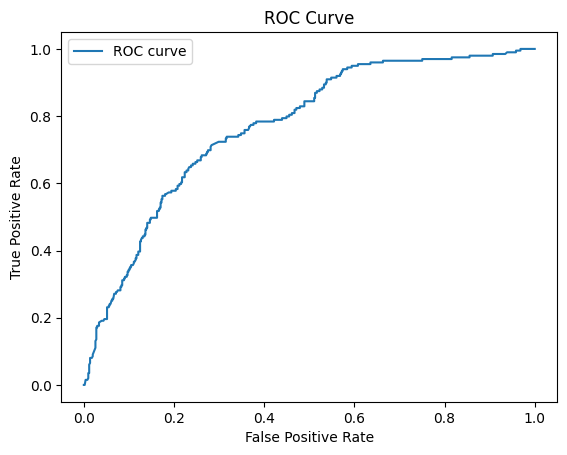

AUC Score: 0.7695258470570675


In [209]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC
auc_score = roc_auc_score(y_test, predictions)
print(f"AUC Score: {auc_score}")


In [210]:
# Save the fine-tuned model
fine_tuned_model.save('fine_tuned_model.h5')
